In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [39]:
from sklearn import datasets

iris = datasets.load_iris()

In [40]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [44]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [45]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
# 테스트 데이터
X = df.drop(['species'], axis=1)
y = df['species']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=2022)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [48]:
y_train.value_counts()

1    40
2    40
0    40
Name: species, dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

In [50]:
y_train

array([1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1,
       0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2,
       1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 0, 2, 1])

In [51]:
from tensorflow.keras.utils import to_categorical # 원-핫인코더
y_train_oh = to_categorical(y_train)
y_train_oh

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

### 모델

In [52]:
X_train_s.shape

(120, 4)

In [65]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [66]:
EPOCHS = 200
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_oh,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2,
                    verbose=1
                    )

Epoch 1/200
3/3 [==============================] - 1s 148ms/step - loss: 0.9944 - acc: 0.6458 - val_loss: 0.9313 - val_acc: 0.7500
Epoch 2/200
3/3 [==============================] - 0s 26ms/step - loss: 0.9328 - acc: 0.6458 - val_loss: 0.8785 - val_acc: 0.7917
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 0.8783 - acc: 0.6979 - val_loss: 0.8297 - val_acc: 0.8333
Epoch 4/200
3/3 [==============================] - 0s 17ms/step - loss: 0.8317 - acc: 0.7396 - val_loss: 0.7846 - val_acc: 0.8333
Epoch 5/200
3/3 [==============================] - 0s 31ms/step - loss: 0.7868 - acc: 0.7708 - val_loss: 0.7434 - val_acc: 0.8333
Epoch 6/200
3/3 [==============================] - 0s 20ms/step - loss: 0.7455 - acc: 0.7917 - val_loss: 0.7046 - val_acc: 0.8333
Epoch 7/200
3/3 [==============================] - 0s 23ms/step - loss: 0.7070 - acc: 0.8229 - val_loss: 0.6692 - val_acc: 0.8750
Epoch 8/200
3/3 [==============================] - 0s 23ms/step - loss: 0.6721 - acc: 0.8

In [67]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [68]:
## 시각화

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

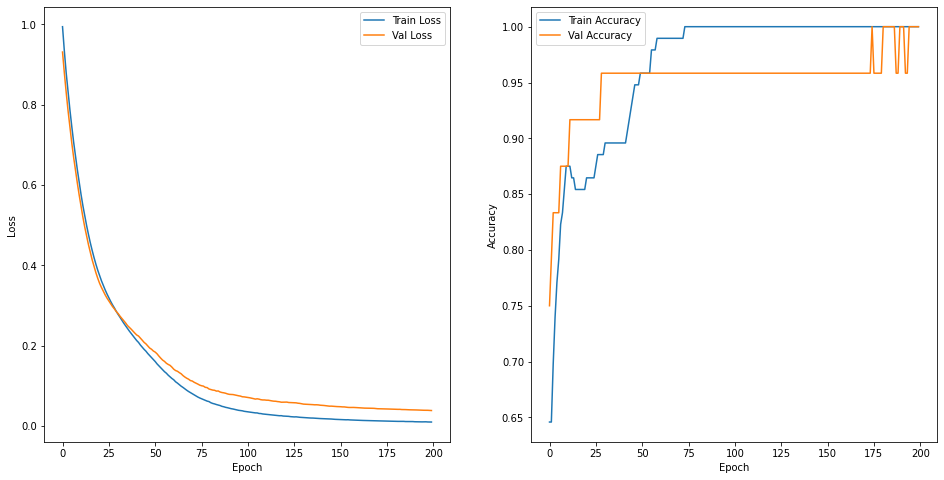

In [69]:
plot_history(history)

In [70]:
# 평가
model.evaluate(X_train_s, y_train_oh)

4/4 [==============================] - 0s 3ms/step - loss: 0.0158 - acc: 1.0000


[0.015823986381292343, 1.0]

In [71]:
X_test_s = scaler.transform(X_test)
y_test_oh = to_categorical(y_test)

In [72]:
model.evaluate(X_test_s, y_test_oh)

1/1 [==============================] - 0s 25ms/step - loss: 0.1829 - acc: 0.9333


[0.18292103707790375, 0.9333333373069763]

In [73]:
# 예측
y_pred = model.predict(X_test_s)
y_pred

1/1 [==============================] - 0s 76ms/step


array([[1.66266443e-06, 6.54270189e-05, 9.99932826e-01],
       [9.99937475e-01, 6.24099339e-05, 2.48111203e-08],
       [8.56396568e-04, 4.00516957e-01, 5.98626554e-01],
       [3.93299386e-04, 9.95668352e-01, 3.93828424e-03],
       [9.99840260e-01, 1.59780102e-04, 1.75066521e-08],
       [9.99959767e-01, 4.02044971e-05, 1.19845778e-08],
       [6.64870022e-04, 3.10009085e-02, 9.68334198e-01],
       [9.99517739e-01, 4.82188072e-04, 2.89834059e-08],
       [2.78708845e-04, 2.93365549e-02, 9.70384657e-01],
       [9.99328792e-01, 6.71100221e-04, 1.08247136e-07],
       [2.22548806e-05, 4.10908870e-02, 9.58886862e-01],
       [9.99967039e-01, 3.28913011e-05, 5.69138292e-09],
       [2.00790091e-05, 3.67626140e-04, 9.99612272e-01],
       [1.64274081e-06, 4.51532163e-04, 9.99546826e-01],
       [8.26157844e-08, 4.21348741e-05, 9.99957740e-01],
       [7.34186615e-05, 9.99649644e-01, 2.76960287e-04],
       [4.75840963e-04, 9.98689532e-01, 8.34593491e-04],
       [2.10515464e-06, 1.44963

In [76]:
y_test.values

array([2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 2])

In [77]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1,
       2, 0, 1, 0, 1, 1, 0, 2])

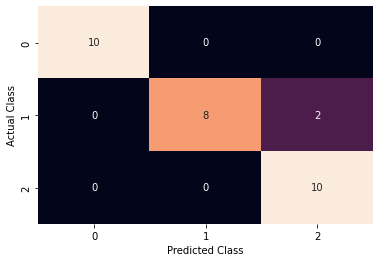

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cbar=False)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()